In [1]:
%%html
<marquee style='width: 90%; color: blue;'><b>INSTITUTO INFNET | ESCOLA SUPERIOR DA
TECNOLOGIA DA INFORMAÇÃO</b></marquee>

![logo_infnet.png](https://www.infnet.edu.br/infnet/wp-content/uploads/sites/6/2021/10/infnet_mod.svg)

<h2>Pós-graduação MIT em Inteligência Artificial, Machine Learning & Deep Learning</h2>

<h3>Projeto da disciplina de Deep Learning com TensorFlow.</h3>

Bloco: Redes neurais com TensorFlow

Docente: Diego da Silva Rodrigues

Aluno: Winicius Botelho Faquieri 

Título: Um modelo de Deep Neural Networks para classificação de estabelecimentos nos segmentos Autosserviço, Mercado Quente e Mercado Frio com diferentes funções de ativação

---

### Um modelo de Deep Neural Networks para classificação de estabelecimentos nos segmentos Autosserviço, Mercado Quente e Mercado Frio com diferentes funções de ativação

separando o conjunto de dados nos segmentos 1, 2 e 3, respectivamente: Autosserviço, Mercado Quente e Mercado Frio.


In [98]:
# Libs:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import inflection
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from sklearn import model_selection as ms
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

## TABLE OF CONTENTS
* [1. Entendendo o Problema de Negócio](#label1)

* [2. A descrição dos dados](##label2)

    * [1.1 Data dimensions](#datadim)
    
    * [1.2 Data types](#datatyp)
    
    * [1.3 Check NA](#checkna)
    
    * [Fillout NA](#filloutna)
    
    * [Change data types](#changetypes)
    
    * [Descriptive statistics](#descrstats)
    
    * [Numerical atributes](#numstats)
    
    * [Categorical atributes](#categ_atrib)     
    
* [3. Feature Engineering](#label3)

* [4. Análise Exploratória dos Dados](#label4)

* [5. Preparação dos Dados](#label5)

* [6. Feature Selection](#label6)

* [7. Modelo de Machine Learning](#)

* [8. Hyperparameter Fine Tuning](#)

* [9. Interpretação e Tradução do Erro](#)

* [10. Deploy do Modelo em Produção](#)

* [References](#)


## 0. Business understanding<a class="anchor" id="dataset_info"></a>

Desafio: classificar empresas em 03 segmentos, a saber:

* Segmento I - Supermercados com 5 ou mais checkouts

* Segmento II - Supermercados com 4 ou menos checkouts (mercadinhos, mercearias, etc)

* Segmento III - Bares, restaurantes, padarias

Utilizaremos os 06 recursos destacados para classificar nossos dados em canais de distribuição ou segmentos I, II ou III:

- Segmento I - Supermercados com 5 ou mais checkouts

- Segmento II - Supermercados com 4 ou menos checkouts (mercadinhos, mercearias, etc)

- Segmento III - Bares, restaurantes, padarias, etc.

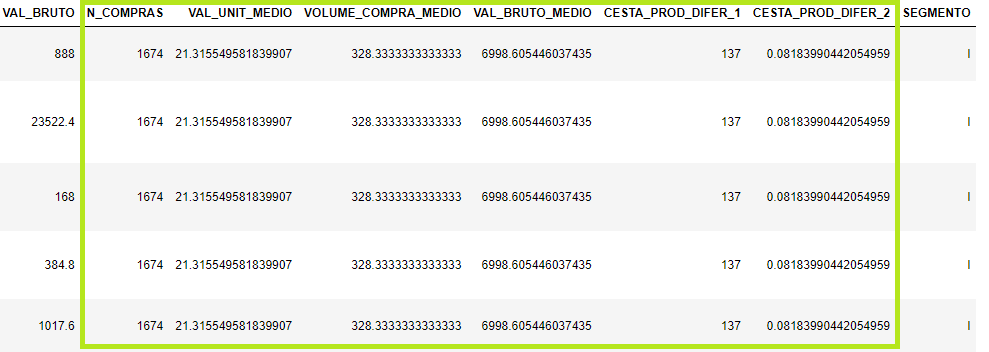

### RESUMO

Primeiramente, realizamos uma análise exploratória de dados onde observamos a distribuição de cada variável, bem como a relação entre cada variável e a variável de interesse (target). Em seguida, realizamos o pré-processamento de dados para remover dados ausentes e também padronizamos nossos dados utilizando uma abordagem robusta devido a presença de valores atípicos. Por fim, dividimos nossos dados originais aleatoriamente em um conjunto de treinamento, um conjunto de validação e um conjunto de teste.

Em seguida, analisamos a arquitetura do MLP que usamos, que consiste em 2 camadas ocultas, com xx nós na primeira camada oculta e xx nós na segunda camada oculta. Em seguida, implementamos esse MLP no Keras usando o modelo sequencial, que nos permite empilhar camadas umas sobre as outras. Então, treinamos nosso MLP usando o conjunto de treinamento, onde Keras usou o algoritmo otimizador Adam para modificar os pesos e vieses na rede neural em mais de 200 iterações, melhorando gradualmente a precisão do modelo.

Por fim, avaliamos nosso modelo usando métricas como acurácia, matriz de confusão e curva ROC. 

### CRISP-DM

- Método cíclico de desenvolvimento do projeto de DS.

- 1º ciclo CRISP completo.
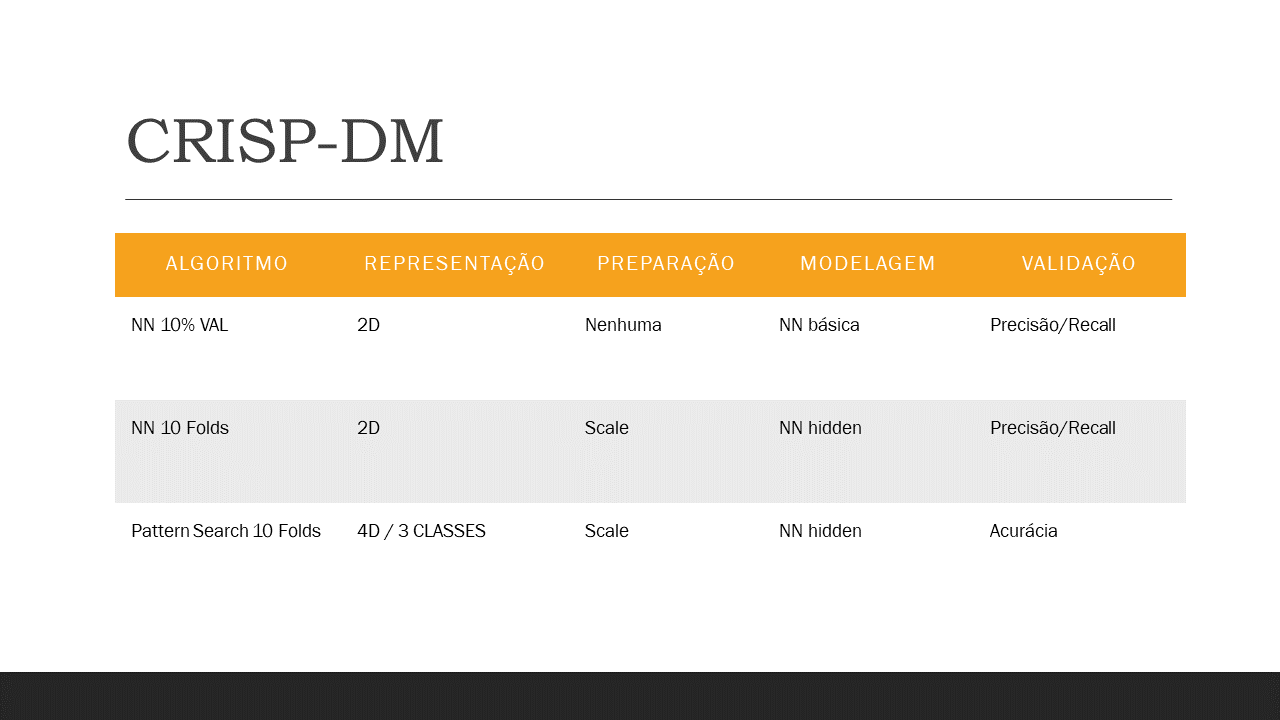



## 1. A Descrição dos Dados <a class="anchor" id="dataset_info"></a>

In [3]:
df = pd.read_csv('../data/dataset.csv', dtype=str)

In [4]:
df.head()

,NUM_DOC_DEST,N_TRANS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,CESTA_PROD_DIFER,seg
0,93209765032582,3847,21.188510626992255,3171.2399272160123,266,I
1,13004510017235,8293,20.919979153356135,295.0801881104546,244,I
2,06966628000122,1115,19.182569216795695,264.914798206278,103,I
3,30029774000106,232,14.686313469827589,62.5,56,I
4,32860231000676,2149,3.087029304447976,836.3192182410423,157,I


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUM_DOC_DEST         3699 non-null   object
 1   N_TRANS              3699 non-null   object
 2   VAL_UNIT_MEDIO       3699 non-null   object
 3   VOLUME_COMPRA_MEDIO  3699 non-null   object
 4   CESTA_PROD_DIFER     3699 non-null   object
 5   seg                  3699 non-null   object
dtypes: object(6)
memory usage: 173.5+ KB


### 1.1 Data Dimensions <a class="anchor" id="datadim"></a>

In [7]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 3699
Number of Cols: 7


### 1.2 Data Types <a class="anchor" id="datatyp"></a>

In [9]:
df.dtypes

NUM_DOC_DEST           object
N_TRANS                object
VAL_UNIT_MEDIO         object
VOLUME_COMPRA_MEDIO    object
CESTA_PROD_DIFER       object
GRUPO_PROD_DIFER       object
seg                    object
dtype: object

### 1.3 Check NA<a class="anchor" id="checkna"></a>

In [10]:
df.isna().sum()

NUM_DOC_DEST           0
N_TRANS                0
VAL_UNIT_MEDIO         0
VOLUME_COMPRA_MEDIO    0
CESTA_PROD_DIFER       0
GRUPO_PROD_DIFER       0
seg                    0
dtype: int64

### 1.4 Change data types <a class="anchor" id="changetypes"></a>

In [6]:
df['N_TRANS'] = df['N_TRANS'].astype( int )

# VAL_UN_COMPRA: VALOR UNITÁRIO PAGO PELA COMPRA
df['VAL_UNIT_MEDIO'] = df['VAL_UNIT_MEDIO'].astype( float )
df['VAL_UNIT_MEDIO'] = df['VAL_UNIT_MEDIO'].round(decimals = 2)

# VAL_BRUTO: VAL_UN_COMPRA X NUM_QTD_COMPRA
df['VOLUME_COMPRA_MEDIO'] = df['VOLUME_COMPRA_MEDIO'].astype( float )
df['VOLUME_COMPRA_MEDIO'] = df['VOLUME_COMPRA_MEDIO'].round(decimals = 2)

df['CESTA_PROD_DIFER'] = df['CESTA_PROD_DIFER'].astype( int )

df.dtypes

NUM_DOC_DEST            object
N_TRANS                  int32
VAL_UNIT_MEDIO         float64
VOLUME_COMPRA_MEDIO    float64
CESTA_PROD_DIFER         int32
seg                     object
dtype: object

### 1.5 Descriptive statistics <a class="anchor" id="descrstats"></a>

In [7]:
num_attributes = df.select_dtypes( include=['int32', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int32', 'float64','datetime64[ns]'] )

### 1.6 Numerical atributes <a class="anchor" id="numstats"></a>

In [8]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,N_TRANS,1.00,8752.00,8751.00,390.512301,151.00,717.239176,4.746505,32.516963
1,VAL_UNIT_MEDIO,0.57,104.89,104.32,17.032476,12.81,15.389505,1.648951,3.817230
2,VOLUME_COMPRA_MEDIO,10.00,9604.96,9594.96,224.864388,112.33,496.712648,7.970708,90.182047
3,CESTA_PROD_DIFER,1.00,332.00,331.00,40.104893,24.00,46.810880,2.326335,6.224756


<AxesSubplot:xlabel='N_TRANS', ylabel='Count'>

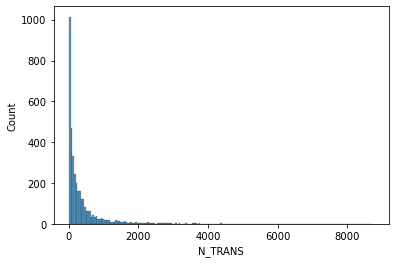

In [9]:
sns.histplot( df['N_TRANS'], kde=False )

### FEATURE ENGINEERING <a class="anchor" id="hipotes"></a>

- Canais de distribuição:

Segmento I - Supermercados com 5 ou mais checkouts

Segmento II - Supermercados com 4 ou menos checkouts (mercadinhos, mercearias, etc)

Segmento III - Bares, restaurantes, padarias, etc.

**Hipóteses**:

- H1: VALOR UNITÁRIO MÉDIO DE COMPRA: É esperado um valor unitário da compra maior de empresas no segmento 3 do que nos segmentos 1 e 2? 



- H2. QUANTIDADE COMPRADA: É esperado um volume médio de compras maior por empresas do segmento 1 do que de outros segmentos?



- H3. CESTA DE PRODUTOS DIFERENTES: é esperado um mix de produtos maior no segmento 1 do que nos segmentos 2 e 3? 



- H4. TRANSAÇÕES EFETUADAS: É esperado um número de compras realizadas maior no segmento 1 do que em outros segmentos?

...


### ANÁLISE EXPLORATÓRIA DE DADOS <a class="anchor" id="prep"></a>

Objetivos:

- Validar hipóteses (insights)

- Perceber variáveis que são importantes para o modelo

### Distribuição da variável target

> Cerca de 2% da coluna SEGMENTO não estão classificados em I, II ou III. Nosso problema consiste em classificar esses dados.

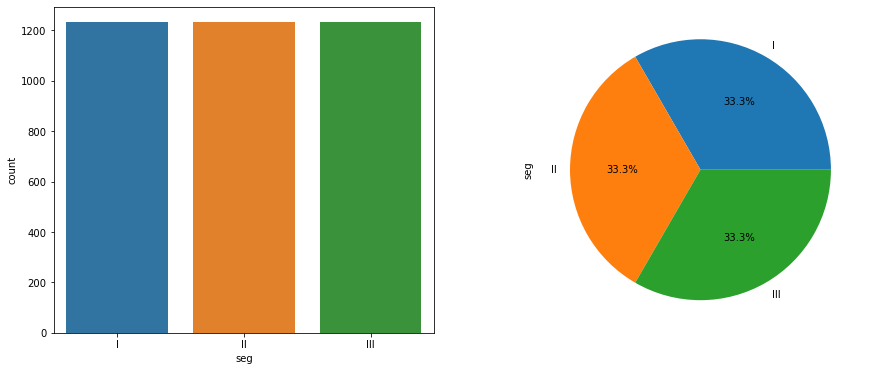

In [10]:
features = df.copy()
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='seg', data=features, ax=ax[0])
_ = features['seg'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

In [65]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NUM_DOC_DEST         3699 non-null   object 
 1   N_TRANS              3699 non-null   int32  
 2   VAL_UNIT_MEDIO       3699 non-null   float64
 3   VOLUME_COMPRA_MEDIO  3699 non-null   float64
 4   CESTA_PROD_DIFER     3699 non-null   int32  
 5   seg                  3699 non-null   object 
dtypes: float64(2), int32(2), object(2)
memory usage: 144.6+ KB


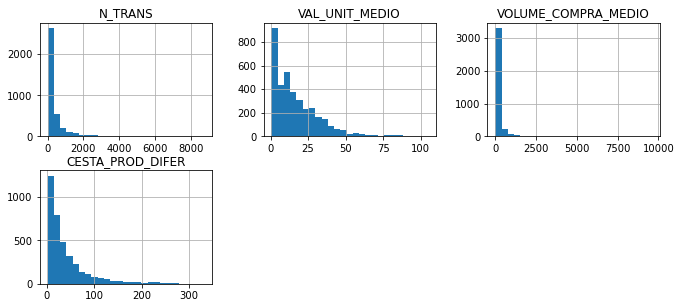

In [11]:
plt.rcParams["figure.figsize"] = (800/72., 4.8)
num_attributes.hist( bins=25, layout=(2,3) );

 - Análise bivariada:
 
 H1: É esperado um valor unitário da compra maior de empresas no segmento 3 do que nos segmentos 1 e 2? Por outras palavras, empresas nesse canal de distribuição (bares e restaurantes) pagam um preço unitário médio maior do que nos outros segmentos?
 
 

<AxesSubplot:xlabel='VAL_UNIT_MEDIO', ylabel='Density'>

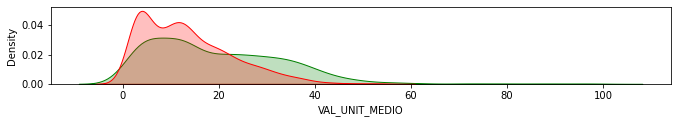

In [68]:
plt.rcParams["figure.figsize"] = (800/72., 4.8)
plt.subplot( 3, 1, 1 )
sns.kdeplot( features[features['seg'] == 'I']['VAL_UNIT_MEDIO'], label='SEGMENTO I', shade=True, color = 'green')
sns.kdeplot( features[features['seg'] == 'II']['VAL_UNIT_MEDIO'], label='SEGMENTO II', shade=True, color = 'red' )

<AxesSubplot:xlabel='VAL_UNIT_MEDIO', ylabel='Density'>

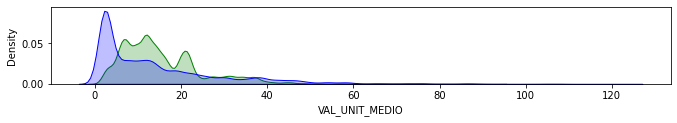

In [76]:
plt.subplot( 3, 1, 1 )
sns.kdeplot( features1[features1['SEGMENTO'] == 'I']['VAL_UNIT_MEDIO'], label='SEGMENTO I', shade=True, color = 'green' )
sns.kdeplot( features1[features1['SEGMENTO'] == 'III']['VAL_UNIT_MEDIO'], label='SEGMENTO III', shade=True , color = 'blue')

<AxesSubplot:xlabel='VAL_UNIT_MEDIO', ylabel='Density'>

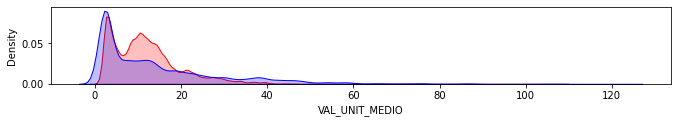

In [84]:
plt.subplot( 3, 1, 1 )
sns.kdeplot( VAL_UNIT_MEDIO[features1['SEGMENTO'] == 'II']['VAL_UNIT_MEDIO'], label='SEGMENTO II', shade=True, color = 'red' )
sns.kdeplot( features1[features1['SEGMENTO'] == 'III']['VAL_UNIT_MEDIO'], label='SEGMENTO III', shade=True, color = 'blue' )

### DATA PREPARATION <a class="anchor" id="prep"></a>

> O aprendizado da maioria dos algoritmos de ML é facilitado por dados numéricos, na mesma escala.

- Normalização: reescala o centro para zero com desvio-padrao igual a 1.


- Rescaling: reescala para o intervalo 0 e 1 (distribuições não Gaussianas):


    - Min-Max Scaler: utiliza o range
    - Robust Scaler: utiliza o IQR


- Transformação: conversão da feature categórica para numérica - encoding - e de natureza.

In [12]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
N_TRANS,3699.0,390.512301,717.336147,1.00,42.000,151.00,412.000,8752.00
VAL_UNIT_MEDIO,3699.0,17.032476,15.391585,0.57,4.885,12.81,24.955,104.89
VOLUME_COMPRA_MEDIO,3699.0,224.864388,496.779803,10.00,40.000,112.33,210.635,9604.96
CESTA_PROD_DIFER,3699.0,40.104893,46.817209,1.00,11.000,24.00,51.000,332.00


<AxesSubplot:xlabel='seg', ylabel='N_TRANS'>

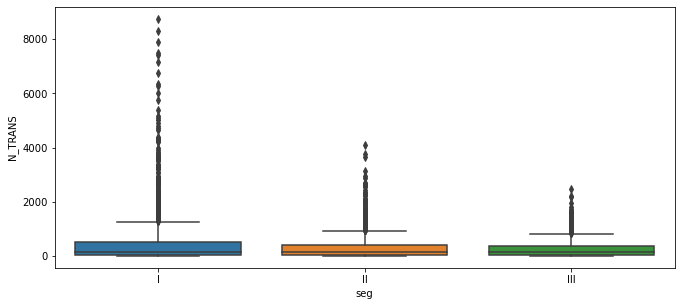

In [13]:
sns.boxplot( x='seg', y='N_TRANS', data=features )

<AxesSubplot:xlabel='seg', ylabel='VAL_UNIT_MEDIO'>

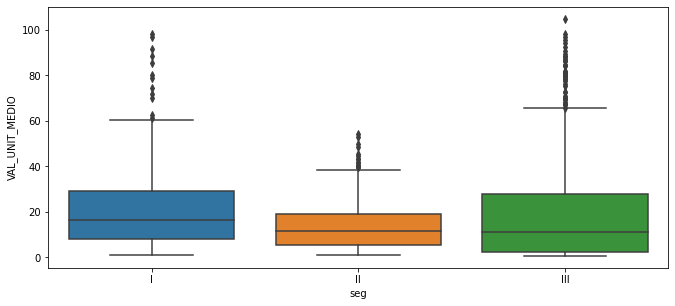

In [28]:
sns.boxplot( x='seg', y='VAL_UNIT_MEDIO', data=features )

<AxesSubplot:xlabel='seg', ylabel='VOLUME_COMPRA_MEDIO'>

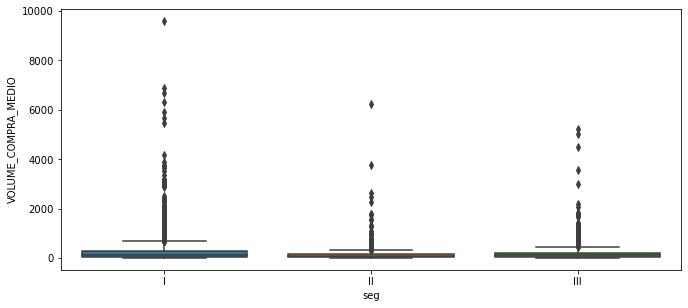

In [29]:
sns.boxplot( x='seg', y='VOLUME_COMPRA_MEDIO', data=features )

<AxesSubplot:xlabel='seg', ylabel='CESTA_PROD_DIFER'>

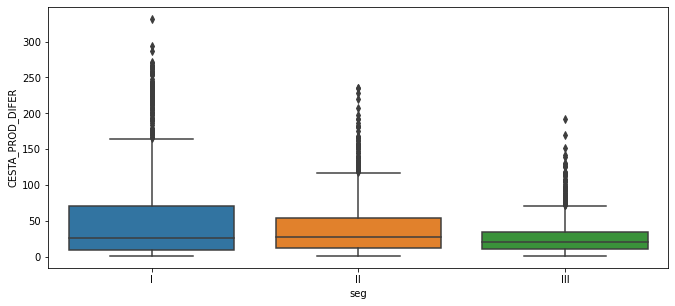

In [32]:
sns.boxplot( x='seg', y='CESTA_PROD_DIFER', data=features )

<AxesSubplot:xlabel='seg', ylabel='GRUPO_PROD_DIFER'>

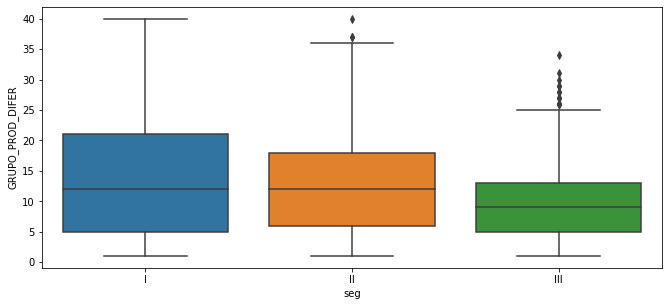

In [35]:
sns.boxplot( x='seg', y='GRUPO_PROD_DIFER', data=features )

### Rescaling: Robust Scaler (RS)

Vamos utilizar o método RS devido a presença de valores atípicos. 

In [14]:
features2 = features.copy()
rs = RobustScaler()

features2['N_TRANS'] = rs.fit_transform( features2[['N_TRANS']].values )
features2['VAL_UNIT_MEDIO'] = rs.fit_transform( features2[['VAL_UNIT_MEDIO']].values )
features2['VOLUME_COMPRA_MEDIO'] = rs.fit_transform( features2[['VOLUME_COMPRA_MEDIO']].values )
features2['CESTA_PROD_DIFER'] = rs.fit_transform( features2[['CESTA_PROD_DIFER']].values )

In [73]:
features2.describe().T

,count,mean,std,min,25%,50%,75%,max
N_TRANS,3699.0,0.647331,1.938746,-0.405405,-0.294595,0.0,0.705405,23.245946
VAL_UNIT_MEDIO,3699.0,0.210387,0.766895,-0.609865,-0.394868,0.0,0.605132,4.587942
VOLUME_COMPRA_MEDIO,3699.0,0.659504,2.911359,-0.599701,-0.423887,0.0,0.576113,55.631201
CESTA_PROD_DIFER,3699.0,0.402622,1.170430,-0.575000,-0.325000,0.0,0.675000,7.700000


In [37]:
# after rescaling
features2.head()

,NUM_DOC_DEST,N_TRANS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,CESTA_PROD_DIFER,GRUPO_PROD_DIFER,seg
0,93209765032582,9.989189,0.417539,17.926627,6.050,2.166667,I
1,13004510017235,22.005405,0.404086,1.071000,5.500,2.250000,I
2,06966628000122,2.605405,0.317389,0.894189,1.975,1.333333,I
3,30029774000106,0.218919,0.093672,-0.292027,0.800,1.000000,I
4,32860231000676,5.400000,-0.484305,4.242916,3.325,1.750000,I


In [61]:
# before
features.head()

,NUM_DOC_DEST,N_COMPRAS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,CESTA_PROD_DIFER_1,CESTA_PROD_DIFER_2,GRUPO_PROD_DIFER_1,seg
0,12058181000196,668.0,5.460947,146.931138,62.0,0.092814,17.0,II
1,93209765032582,3847.0,21.188511,3171.239927,266.0,0.069145,36.0,I
2,13004510017235,8293.0,20.919979,295.080188,244.0,0.029422,37.0,I
3,01031452000101,170.0,27.170852,167.411765,28.0,0.164706,12.0,III
4,13964957000108,128.0,20.630894,66.484375,36.0,0.281250,18.0,III


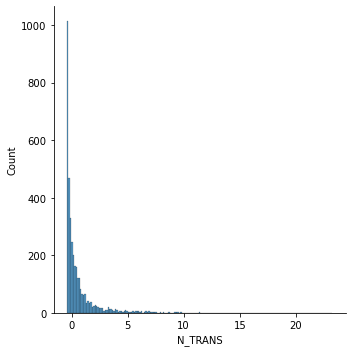

In [43]:
sns.displot( features2['N_TRANS'] );

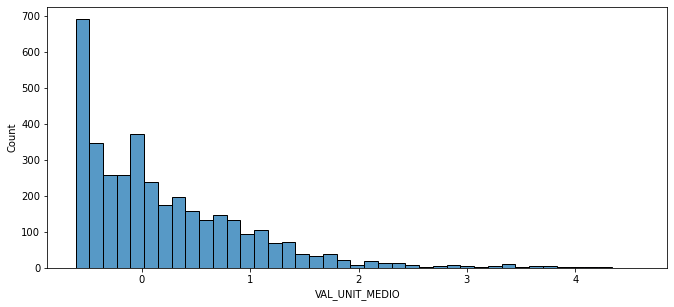

In [42]:
sns.histplot( features2['VAL_UNIT_MEDIO'] );

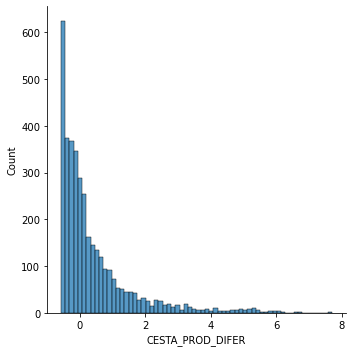

In [44]:
sns.displot( features2['CESTA_PROD_DIFER'] );

### Encoding da variável categórica

In [15]:
features3 = features2.copy()

# Segmento - Ordinal Encoding
segmento_dict = {'I': 1, 'II': 2, 'III': 3}
features3['seg'] = features3['seg'].map( segmento_dict );

In [16]:
features3 = features3.drop( 'NUM_DOC_DEST', axis=1 )

### FEATURE SELECTION

> The process of reducing the number of input variables when developing a predictive model. 
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, 
in some cases, to improve the performance of the model.

FILTER (before training) X WRAPPER (ocorre após o treinamento e utiliza as estatísticas geradas pelo próprio modelo)

- Análise estatítica
- Filter: Correlação, ANOVA.
- Wrapper: Árvores de decisão (entropia/**gini**), redes neurais (dropout/**relevância**)
- Correlação x Relevância
- Multicolinearidade -> Análise Discriminante Linear (LDA) ?


### Dividindo os dados em conjuntos de treinamento, teste e validação

#### Setup:
    - Full data 100% 
    - test      20%  -> Generalization!
    - training  80%, sendo 80% train + 20% validation -> Aprendizado!

In [18]:
features4 = features3.copy()
# features4.to_pickle('../data/features4.pickle')

In [ ]:
# features4 = pd.read_pickle('../data/features4.pickle')

In [19]:
class_col = 'seg'
my_vars = list(features4.columns[features4.columns != class_col])
X = features4[my_vars]
X = np.asarray(X).astype('float32')

y = features4[[class_col]].values.ravel()

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [20]:
# # # split training into train and test datset
X_train, X_test, y_train, y_test = ms.train_test_split(X, dummy_y, test_size=0.2, random_state=42)

print( X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2367, 4) (2367, 3) (740, 4) (740, 3) (592, 4) (592, 3)


# DNN Training

In [ ]:
# ==================== 1ª Epoca =======================
# foward: dados * pesos -> função de ativação -> predito
# real - predito = erro
# backpropagation: erro -> derivadas parciais -> update pesos

# ==================== 2ª Epoca =======================
# foward: dados * pesos -> função de ativação -> predito
# real - predito = erro
# backpropagation: erro -> derivadas parciais -> update pesos

# Até os pesos convergirem...

- Definindo o número de neurônios na hidden layer

1. O número de neurônios ocultos deve estar entre o tamanho da camada de entrada e o tamanho da camada de saída.

2. O número de neurônios ocultos deve ser 2/3 do tamanho da camada de entrada, mais o tamanho da camada de saída.

3. O número de neurônios ocultos deve ser menor que o dobro do tamanho da camada de entrada.

Essas três regras fornecem um ponto de partida para você considerar. Em última análise, a seleção de uma arquitetura para sua rede neural se resume a tentativa e erro.

Utilizamos para este fim duas abordagens:

1. Grid search (tentativa e erro). Testamos, nesse sentido, várias combinações para chegarmos no melhor resultado; e
2. Resultado de pesquisas anteriores em problemas similares serviu para nortear o trabalho. Mais especificamente, o trabalho de [ELDEM et. al (2018)](https://ieeexplore.ieee.org/document/8620866).

In [132]:
# define baseline model:
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_dim=4))

# Add the second hidden layer
model.add(Dense(20, activation='tanh'))

# Add the output layer 
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [133]:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=10000)

Epoch 1/10000
74/74 [==============================] - 2s 4ms/step - loss: 1.0454 - accuracy: 0.4149
Epoch 2/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.9894 - accuracy: 0.5040
Epoch 3/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.9669 - accuracy: 0.5289
Epoch 4/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.9491 - accuracy: 0.5361
Epoch 5/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.9360 - accuracy: 0.5509
Epoch 6/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.9314 - accuracy: 0.5547
Epoch 7/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.9248 - accuracy: 0.5657
Epoch 8/10000
74/74 [==============================] - 1s 7ms/step - loss: 0.9206 - accuracy: 0.5644
Epoch 9/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.9173 - accuracy: 0.5670
Epoch 10/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.9150 - accura

74/74 [==============================] - 0s 3ms/step - loss: 0.8633 - accuracy: 0.6054
Epoch 82/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8625 - accuracy: 0.6041
Epoch 83/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8667 - accuracy: 0.6008
Epoch 84/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8612 - accuracy: 0.6084
Epoch 85/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8630 - accuracy: 0.6037
Epoch 86/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8606 - accuracy: 0.6058
Epoch 87/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8596 - accuracy: 0.6037
Epoch 88/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8596 - accuracy: 0.6046
Epoch 89/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8605 - accuracy: 0.6075
Epoch 90/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8632 - accuracy: 0.

74/74 [==============================] - 0s 6ms/step - loss: 0.8340 - accuracy: 0.6202
Epoch 161/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8341 - accuracy: 0.6210
Epoch 162/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8316 - accuracy: 0.6185
Epoch 163/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8364 - accuracy: 0.6206
Epoch 164/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8334 - accuracy: 0.6181
Epoch 165/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8314 - accuracy: 0.6198
Epoch 166/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.8327 - accuracy: 0.6105
Epoch 167/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8326 - accuracy: 0.6168
Epoch 168/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8305 - accuracy: 0.6177
Epoch 169/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8322 - acc

74/74 [==============================] - 0s 4ms/step - loss: 0.8099 - accuracy: 0.6375
Epoch 240/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8133 - accuracy: 0.6401
Epoch 241/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8128 - accuracy: 0.6384
Epoch 242/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8074 - accuracy: 0.6455
Epoch 243/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8093 - accuracy: 0.6367
Epoch 244/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8129 - accuracy: 0.6388
Epoch 245/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8091 - accuracy: 0.6396
Epoch 246/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8090 - accuracy: 0.6409
Epoch 247/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8125 - accuracy: 0.6379
Epoch 248/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.8096 - acc

74/74 [==============================] - 0s 4ms/step - loss: 0.7986 - accuracy: 0.6451
Epoch 319/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7998 - accuracy: 0.6396
Epoch 320/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7949 - accuracy: 0.6396
Epoch 321/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7986 - accuracy: 0.6464
Epoch 322/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7974 - accuracy: 0.6426
Epoch 323/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7978 - accuracy: 0.6413
Epoch 324/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8010 - accuracy: 0.6362
Epoch 325/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7983 - accuracy: 0.6434
Epoch 326/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.8014 - accuracy: 0.6396
Epoch 327/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7961 - acc

74/74 [==============================] - 0s 3ms/step - loss: 0.7835 - accuracy: 0.6527
Epoch 398/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7853 - accuracy: 0.6430
Epoch 399/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7865 - accuracy: 0.6443
Epoch 400/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7850 - accuracy: 0.6455
Epoch 401/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7864 - accuracy: 0.6422
Epoch 402/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7877 - accuracy: 0.6434
Epoch 403/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7869 - accuracy: 0.6455
Epoch 404/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7889 - accuracy: 0.6544
Epoch 405/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7880 - accuracy: 0.6455
Epoch 406/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7855 - acc

74/74 [==============================] - 0s 3ms/step - loss: 0.7802 - accuracy: 0.6527
Epoch 477/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7753 - accuracy: 0.6565
Epoch 478/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7765 - accuracy: 0.6515
Epoch 479/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7746 - accuracy: 0.6468
Epoch 480/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7784 - accuracy: 0.6477
Epoch 481/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7773 - accuracy: 0.6506
Epoch 482/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7754 - accuracy: 0.6502
Epoch 483/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7756 - accuracy: 0.6531
Epoch 484/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7770 - accuracy: 0.6443
Epoch 485/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7776 - acc

74/74 [==============================] - 0s 3ms/step - loss: 0.7685 - accuracy: 0.6548
Epoch 556/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7664 - accuracy: 0.6527
Epoch 557/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7694 - accuracy: 0.6582
Epoch 558/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7700 - accuracy: 0.6557
Epoch 559/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7681 - accuracy: 0.6603
Epoch 560/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7653 - accuracy: 0.6582
Epoch 561/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7654 - accuracy: 0.6540
Epoch 562/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7658 - accuracy: 0.6565
Epoch 563/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7656 - accuracy: 0.6493
Epoch 564/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7661 - acc

74/74 [==============================] - 0s 4ms/step - loss: 0.7548 - accuracy: 0.6637
Epoch 635/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7539 - accuracy: 0.6599
Epoch 636/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7559 - accuracy: 0.6578
Epoch 637/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7614 - accuracy: 0.6612
Epoch 638/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7615 - accuracy: 0.6578
Epoch 639/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7542 - accuracy: 0.6633
Epoch 640/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7584 - accuracy: 0.6578
Epoch 641/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7592 - accuracy: 0.6574
Epoch 642/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7517 - accuracy: 0.6641
Epoch 643/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7537 - acc

74/74 [==============================] - 0s 4ms/step - loss: 0.7538 - accuracy: 0.6527
Epoch 714/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7480 - accuracy: 0.6616
Epoch 715/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7454 - accuracy: 0.6608
Epoch 716/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7503 - accuracy: 0.6616
Epoch 717/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7522 - accuracy: 0.6620
Epoch 718/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7464 - accuracy: 0.6620
Epoch 719/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7469 - accuracy: 0.6637
Epoch 720/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7452 - accuracy: 0.6633
Epoch 721/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7433 - accuracy: 0.6637
Epoch 722/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7481 - acc

74/74 [==============================] - 0s 3ms/step - loss: 0.7423 - accuracy: 0.6641
Epoch 793/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7368 - accuracy: 0.6705
Epoch 794/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7339 - accuracy: 0.6772
Epoch 795/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.6684
Epoch 796/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7423 - accuracy: 0.6629
Epoch 797/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7386 - accuracy: 0.6667
Epoch 798/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7426 - accuracy: 0.6637
Epoch 799/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7374 - accuracy: 0.6743
Epoch 800/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7370 - accuracy: 0.6705
Epoch 801/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7358 - acc

74/74 [==============================] - 0s 3ms/step - loss: 0.7296 - accuracy: 0.6743
Epoch 872/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7277 - accuracy: 0.6760
Epoch 873/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7304 - accuracy: 0.6662
Epoch 874/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7339 - accuracy: 0.6667
Epoch 875/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7299 - accuracy: 0.6738
Epoch 876/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7256 - accuracy: 0.6806
Epoch 877/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7300 - accuracy: 0.6675
Epoch 878/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7292 - accuracy: 0.6709
Epoch 879/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7281 - accuracy: 0.6747
Epoch 880/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7296 - acc

74/74 [==============================] - 0s 3ms/step - loss: 0.7206 - accuracy: 0.6747
Epoch 951/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7233 - accuracy: 0.6679
Epoch 952/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.6700
Epoch 953/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7274 - accuracy: 0.6667
Epoch 954/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7219 - accuracy: 0.6713
Epoch 955/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7254 - accuracy: 0.6772
Epoch 956/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7214 - accuracy: 0.6667
Epoch 957/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7195 - accuracy: 0.6764
Epoch 958/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.6772
Epoch 959/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7257 - acc

74/74 [==============================] - 0s 3ms/step - loss: 0.7143 - accuracy: 0.6840
Epoch 1030/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7233 - accuracy: 0.6743
Epoch 1031/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.6772
Epoch 1032/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7179 - accuracy: 0.6633
Epoch 1033/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.6709
Epoch 1034/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7159 - accuracy: 0.6768
Epoch 1035/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.6688
Epoch 1036/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7137 - accuracy: 0.6777
Epoch 1037/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7128 - accuracy: 0.6806
Epoch 1038/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.7

74/74 [==============================] - 0s 4ms/step - loss: 0.7089 - accuracy: 0.6747
Epoch 1108/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7097 - accuracy: 0.6768
Epoch 1109/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7084 - accuracy: 0.6793
Epoch 1110/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7102 - accuracy: 0.6751
Epoch 1111/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7106 - accuracy: 0.6760
Epoch 1112/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7081 - accuracy: 0.6831
Epoch 1113/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7074 - accuracy: 0.6789
Epoch 1114/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7058 - accuracy: 0.6734
Epoch 1115/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7065 - accuracy: 0.6798
Epoch 1116/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.7

74/74 [==============================] - 0s 4ms/step - loss: 0.7020 - accuracy: 0.6726
Epoch 1186/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.6857
Epoch 1187/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6994 - accuracy: 0.6882
Epoch 1188/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7034 - accuracy: 0.6802
Epoch 1189/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.6798
Epoch 1190/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7016 - accuracy: 0.6772
Epoch 1191/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.6853
Epoch 1192/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.6777
Epoch 1193/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.6861
Epoch 1194/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.7

74/74 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.6878
Epoch 1264/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.6823
Epoch 1265/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.6827
Epoch 1266/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.6772
Epoch 1267/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.6840
Epoch 1268/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.6802
Epoch 1269/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.6861
Epoch 1270/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.6882
Epoch 1271/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.6869
Epoch 1272/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6

74/74 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.6916
Epoch 1342/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.6844
Epoch 1343/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.6819
Epoch 1344/10000
74/74 [==============================] - 0s 6ms/step - loss: 0.6869 - accuracy: 0.6899
Epoch 1345/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.6878
Epoch 1346/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.6929
Epoch 1347/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.6848
Epoch 1348/10000
74/74 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.6751
Epoch 1349/10000
74/74 [==============================] - 0s 6ms/step - loss: 0.6853 - accuracy: 0.6785
Epoch 1350/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.6861
Epoch 1420/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.6962
Epoch 1421/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.6941
Epoch 1422/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.6988
Epoch 1423/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.6907
Epoch 1424/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.6882
Epoch 1425/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.6920
Epoch 1426/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.6958
Epoch 1427/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.6895
Epoch 1428/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6

74/74 [==============================] - 0s 5ms/step - loss: 0.6717 - accuracy: 0.6984
Epoch 1498/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.6950
Epoch 1499/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.6950
Epoch 1500/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6764 - accuracy: 0.6971
Epoch 1501/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6772 - accuracy: 0.6916
Epoch 1502/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6788 - accuracy: 0.6984
Epoch 1503/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6783 - accuracy: 0.6886
Epoch 1504/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6734 - accuracy: 0.6958
Epoch 1505/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6746 - accuracy: 0.6891
Epoch 1506/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.7005
Epoch 1576/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6672 - accuracy: 0.6984
Epoch 1577/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6715 - accuracy: 0.7017
Epoch 1578/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6695 - accuracy: 0.6937
Epoch 1579/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6673 - accuracy: 0.6967
Epoch 1580/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6709 - accuracy: 0.6946
Epoch 1581/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6658 - accuracy: 0.6975
Epoch 1582/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6640 - accuracy: 0.6971
Epoch 1583/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6715 - accuracy: 0.6882
Epoch 1584/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6891
Epoch 1654/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6685 - accuracy: 0.6967
Epoch 1655/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6606 - accuracy: 0.7005
Epoch 1656/10000
74/74 [==============================] - 0s 6ms/step - loss: 0.6625 - accuracy: 0.7013
Epoch 1657/10000
74/74 [==============================] - 0s 6ms/step - loss: 0.6627 - accuracy: 0.7005
Epoch 1658/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.6962
Epoch 1659/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6988
Epoch 1660/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6610 - accuracy: 0.6988
Epoch 1661/10000
74/74 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.6941
Epoch 1662/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6585 - accuracy: 0.7013
Epoch 1732/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6573 - accuracy: 0.7060
Epoch 1733/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.7076
Epoch 1734/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.7005
Epoch 1735/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.6992
Epoch 1736/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.7038
Epoch 1737/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.6933
Epoch 1738/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.7017
Epoch 1739/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.6950
Epoch 1740/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.7110
Epoch 1810/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6937
Epoch 1811/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.7098
Epoch 1812/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.7022
Epoch 1813/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.7068
Epoch 1814/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.7047
Epoch 1815/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6498 - accuracy: 0.7038
Epoch 1816/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.7017
Epoch 1817/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.7106
Epoch 1818/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6444 - accuracy: 0.7123
Epoch 1888/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.7110
Epoch 1889/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.7055
Epoch 1890/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.7076
Epoch 1891/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.7047
Epoch 1892/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6435 - accuracy: 0.7106
Epoch 1893/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.7064
Epoch 1894/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.7068
Epoch 1895/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.7106
Epoch 1896/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6578 - accuracy: 0.7047
Epoch 1966/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.7038
Epoch 1967/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6408 - accuracy: 0.7089
Epoch 1968/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6407 - accuracy: 0.7038
Epoch 1969/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6488 - accuracy: 0.7114
Epoch 1970/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.7064
Epoch 1971/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6428 - accuracy: 0.7055
Epoch 1972/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6475 - accuracy: 0.7089
Epoch 1973/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6401 - accuracy: 0.7119
Epoch 1974/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6

74/74 [==============================] - 0s 6ms/step - loss: 0.6358 - accuracy: 0.7233
Epoch 2044/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6426 - accuracy: 0.7068
Epoch 2045/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6358 - accuracy: 0.7191
Epoch 2046/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.7098
Epoch 2047/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6363 - accuracy: 0.7199
Epoch 2048/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.7064
Epoch 2049/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.7076
Epoch 2050/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6348 - accuracy: 0.7258
Epoch 2051/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.7072
Epoch 2052/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6333 - accuracy: 0.7195
Epoch 2122/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.7038
Epoch 2123/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.7106
Epoch 2124/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6312 - accuracy: 0.7182
Epoch 2125/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.7127
Epoch 2126/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.7081
Epoch 2127/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6360 - accuracy: 0.7131
Epoch 2128/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6305 - accuracy: 0.7203
Epoch 2129/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6342 - accuracy: 0.7153
Epoch 2130/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6

74/74 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.7089
Epoch 2200/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.7148
Epoch 2201/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6287 - accuracy: 0.7169
Epoch 2202/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 0.7102
Epoch 2203/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.7110
Epoch 2204/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6352 - accuracy: 0.7136
Epoch 2205/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6272 - accuracy: 0.7131
Epoch 2206/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6301 - accuracy: 0.7106
Epoch 2207/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.7203
Epoch 2208/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.7131
Epoch 2278/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6245 - accuracy: 0.7207
Epoch 2279/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6229 - accuracy: 0.7195
Epoch 2280/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6293 - accuracy: 0.7199
Epoch 2281/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6207 - accuracy: 0.7241
Epoch 2282/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6267 - accuracy: 0.7250
Epoch 2283/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6239 - accuracy: 0.7153
Epoch 2284/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6258 - accuracy: 0.7199
Epoch 2285/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.7174
Epoch 2286/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6182 - accuracy: 0.7254
Epoch 2356/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.7212
Epoch 2357/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6220 - accuracy: 0.7229
Epoch 2358/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.7119
Epoch 2359/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6181 - accuracy: 0.7254
Epoch 2360/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6181 - accuracy: 0.7229
Epoch 2361/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6256 - accuracy: 0.7161
Epoch 2362/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6262 - accuracy: 0.7191
Epoch 2363/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6162 - accuracy: 0.7262
Epoch 2364/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6

74/74 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.7199
Epoch 2434/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6156 - accuracy: 0.7216
Epoch 2435/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.7262
Epoch 2436/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.7195
Epoch 2437/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6208 - accuracy: 0.7224
Epoch 2438/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.7250
Epoch 2439/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6171 - accuracy: 0.7199
Epoch 2440/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6169 - accuracy: 0.7300
Epoch 2441/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.7237
Epoch 2442/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6

74/74 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.7267
Epoch 2512/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.7216
Epoch 2513/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.7224
Epoch 2514/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6128 - accuracy: 0.7267
Epoch 2515/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6107 - accuracy: 0.7271
Epoch 2516/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.7258
Epoch 2517/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6107 - accuracy: 0.7347
Epoch 2518/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.7182
Epoch 2519/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.7292
Epoch 2520/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6

74/74 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.7237
Epoch 2590/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6107 - accuracy: 0.7283
Epoch 2591/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.7326
Epoch 2592/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6060 - accuracy: 0.7262
Epoch 2593/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.7279
Epoch 2594/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6072 - accuracy: 0.7241
Epoch 2595/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7233
Epoch 2596/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.7322
Epoch 2597/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6109 - accuracy: 0.7309
Epoch 2598/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.6

74/74 [==============================] - 0s 4ms/step - loss: 0.6050 - accuracy: 0.7258
Epoch 2668/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5986 - accuracy: 0.7326
Epoch 2669/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5978 - accuracy: 0.7300
Epoch 2670/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6034 - accuracy: 0.7288
Epoch 2671/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6053 - accuracy: 0.7279
Epoch 2672/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6019 - accuracy: 0.7313
Epoch 2673/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.7292
Epoch 2674/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6029 - accuracy: 0.7347
Epoch 2675/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.6013 - accuracy: 0.7296
Epoch 2676/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5970 - accuracy: 0.7351
Epoch 2746/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5978 - accuracy: 0.7326
Epoch 2747/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.7334
Epoch 2748/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5921 - accuracy: 0.7330
Epoch 2749/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.6017 - accuracy: 0.7283
Epoch 2750/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.7326
Epoch 2751/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5980 - accuracy: 0.7355
Epoch 2752/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5944 - accuracy: 0.7360
Epoch 2753/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5974 - accuracy: 0.7292
Epoch 2754/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.7381
Epoch 2824/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.7355
Epoch 2825/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.7296
Epoch 2826/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.7347
Epoch 2827/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.7322
Epoch 2828/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7317
Epoch 2829/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.7393
Epoch 2830/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.7368
Epoch 2831/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5977 - accuracy: 0.7292
Epoch 2832/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.7292
Epoch 2902/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5856 - accuracy: 0.7347
Epoch 2903/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.7410
Epoch 2904/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.7393
Epoch 2905/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.7296
Epoch 2906/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.7414
Epoch 2907/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5860 - accuracy: 0.7385
Epoch 2908/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5878 - accuracy: 0.7393
Epoch 2909/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5855 - accuracy: 0.7376
Epoch 2910/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5823 - accuracy: 0.7364
Epoch 2980/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5841 - accuracy: 0.7347
Epoch 2981/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.7389
Epoch 2982/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7326
Epoch 2983/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.7355
Epoch 2984/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5791 - accuracy: 0.7474
Epoch 2985/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7385
Epoch 2986/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5873 - accuracy: 0.7351
Epoch 2987/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5886 - accuracy: 0.7360
Epoch 2988/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5825 - accuracy: 0.7402
Epoch 3058/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5808 - accuracy: 0.7414
Epoch 3059/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5782 - accuracy: 0.7406
Epoch 3060/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5839 - accuracy: 0.7385
Epoch 3061/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5815 - accuracy: 0.7448
Epoch 3062/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5781 - accuracy: 0.7444
Epoch 3063/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5818 - accuracy: 0.7440
Epoch 3064/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7440
Epoch 3065/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5823 - accuracy: 0.7330
Epoch 3066/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5777 - accuracy: 0.7541
Epoch 3136/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5771 - accuracy: 0.7469
Epoch 3137/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7444
Epoch 3138/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.7372
Epoch 3139/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5774 - accuracy: 0.7389
Epoch 3140/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5776 - accuracy: 0.7419
Epoch 3141/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5743 - accuracy: 0.7406
Epoch 3142/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5779 - accuracy: 0.7461
Epoch 3143/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.7393
Epoch 3144/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5710 - accuracy: 0.7469
Epoch 3214/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5757 - accuracy: 0.7448
Epoch 3215/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5731 - accuracy: 0.7503
Epoch 3216/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5768 - accuracy: 0.7461
Epoch 3217/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5751 - accuracy: 0.7461
Epoch 3218/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.7414
Epoch 3219/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.7474
Epoch 3220/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5722 - accuracy: 0.7448
Epoch 3221/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.7507
Epoch 3222/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5662 - accuracy: 0.7503
Epoch 3292/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7465
Epoch 3293/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.7482
Epoch 3294/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5692 - accuracy: 0.7469
Epoch 3295/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.7448
Epoch 3296/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.7461
Epoch 3297/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7436
Epoch 3298/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.7465
Epoch 3299/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.7368
Epoch 3300/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5675 - accuracy: 0.7516
Epoch 3370/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.7533
Epoch 3371/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.7499
Epoch 3372/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5679 - accuracy: 0.7503
Epoch 3373/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5678 - accuracy: 0.7482
Epoch 3374/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5656 - accuracy: 0.7465
Epoch 3375/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5670 - accuracy: 0.7469
Epoch 3376/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7512
Epoch 3377/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.7499
Epoch 3378/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.7448
Epoch 3448/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5676 - accuracy: 0.7478
Epoch 3449/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5667 - accuracy: 0.7512
Epoch 3450/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5628 - accuracy: 0.7478
Epoch 3451/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7507
Epoch 3452/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5607 - accuracy: 0.7512
Epoch 3453/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5625 - accuracy: 0.7490
Epoch 3454/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5663 - accuracy: 0.7537
Epoch 3455/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.7507
Epoch 3456/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7579
Epoch 3526/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5621 - accuracy: 0.7545
Epoch 3527/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5628 - accuracy: 0.7533
Epoch 3528/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7503
Epoch 3529/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.7550
Epoch 3530/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5573 - accuracy: 0.7533
Epoch 3531/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5558 - accuracy: 0.7588
Epoch 3532/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5629 - accuracy: 0.7427
Epoch 3533/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.7554
Epoch 3534/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.7562
Epoch 3604/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.7575
Epoch 3605/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.7545
Epoch 3606/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5577 - accuracy: 0.7550
Epoch 3607/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5568 - accuracy: 0.7537
Epoch 3608/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5577 - accuracy: 0.7575
Epoch 3609/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5612 - accuracy: 0.7431
Epoch 3610/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7474
Epoch 3611/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.7503
Epoch 3612/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.7562
Epoch 3682/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7583
Epoch 3683/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.7499
Epoch 3684/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7524
Epoch 3685/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7550
Epoch 3686/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5519 - accuracy: 0.7575
Epoch 3687/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7545
Epoch 3688/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5494 - accuracy: 0.7588
Epoch 3689/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5493 - accuracy: 0.7529
Epoch 3690/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.7579
Epoch 3760/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.7592
Epoch 3761/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7596
Epoch 3762/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7583
Epoch 3763/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7609
Epoch 3764/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.7558
Epoch 3765/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.7588
Epoch 3766/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.7541
Epoch 3767/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.7592
Epoch 3768/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 3ms/step - loss: 0.5483 - accuracy: 0.7579
Epoch 3838/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5446 - accuracy: 0.7588
Epoch 3839/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5444 - accuracy: 0.7583
Epoch 3840/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5519 - accuracy: 0.7550
Epoch 3841/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5498 - accuracy: 0.7524
Epoch 3842/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5456 - accuracy: 0.7596
Epoch 3843/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5415 - accuracy: 0.7621
Epoch 3844/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5481 - accuracy: 0.7579
Epoch 3845/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5445 - accuracy: 0.7558
Epoch 3846/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.7558
Epoch 3916/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5390 - accuracy: 0.7617
Epoch 3917/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5402 - accuracy: 0.7609
Epoch 3918/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5474 - accuracy: 0.7537
Epoch 3919/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5451 - accuracy: 0.7596
Epoch 3920/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5448 - accuracy: 0.7545
Epoch 3921/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5479 - accuracy: 0.7541
Epoch 3922/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5461 - accuracy: 0.7571
Epoch 3923/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.7613
Epoch 3924/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.7655
Epoch 3994/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5386 - accuracy: 0.7613
Epoch 3995/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5466 - accuracy: 0.7626
Epoch 3996/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5391 - accuracy: 0.7596
Epoch 3997/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7605
Epoch 3998/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5405 - accuracy: 0.7655
Epoch 3999/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5397 - accuracy: 0.7681
Epoch 4000/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5439 - accuracy: 0.7554
Epoch 4001/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5387 - accuracy: 0.7579
Epoch 4002/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5397 - accuracy: 0.7617
Epoch 4072/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.7605
Epoch 4073/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.7617
Epoch 4074/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.7634
Epoch 4075/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.7672
Epoch 4076/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5372 - accuracy: 0.7664
Epoch 4077/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.7562
Epoch 4078/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7638
Epoch 4079/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7651
Epoch 4080/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5345 - accuracy: 0.7685
Epoch 4150/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5331 - accuracy: 0.7702
Epoch 4151/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.7638
Epoch 4152/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.7554
Epoch 4153/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.7698
Epoch 4154/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.7681
Epoch 4155/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.7630
Epoch 4156/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.7668
Epoch 4157/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7617
Epoch 4158/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.7681
Epoch 4228/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.7621
Epoch 4229/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7638
Epoch 4230/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5379 - accuracy: 0.7638
Epoch 4231/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7710
Epoch 4232/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5360 - accuracy: 0.7659
Epoch 4233/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7676
Epoch 4234/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5398 - accuracy: 0.7681
Epoch 4235/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5407 - accuracy: 0.7630
Epoch 4236/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5351 - accuracy: 0.7655
Epoch 4306/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7655
Epoch 4307/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5296 - accuracy: 0.7719
Epoch 4308/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5400 - accuracy: 0.7626
Epoch 4309/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5430 - accuracy: 0.7630
Epoch 4310/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5374 - accuracy: 0.7685
Epoch 4311/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7621
Epoch 4312/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7693
Epoch 4313/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5596 - accuracy: 0.7592
Epoch 4314/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 5ms/step - loss: 0.5323 - accuracy: 0.7698
Epoch 4384/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5285 - accuracy: 0.7693
Epoch 4385/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.7659
Epoch 4386/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5264 - accuracy: 0.7689
Epoch 4387/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.7651
Epoch 4388/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5280 - accuracy: 0.7698
Epoch 4389/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5253 - accuracy: 0.7731
Epoch 4390/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5247 - accuracy: 0.7740
Epoch 4391/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.7706
Epoch 4392/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.7736
Epoch 4462/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7719
Epoch 4463/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7714
Epoch 4464/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7778
Epoch 4465/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5246 - accuracy: 0.7659
Epoch 4466/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7723
Epoch 4467/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.7676
Epoch 4468/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5237 - accuracy: 0.7672
Epoch 4469/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5211 - accuracy: 0.7710
Epoch 4470/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7689
Epoch 4540/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.7778
Epoch 4541/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.7731
Epoch 4542/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5181 - accuracy: 0.7744
Epoch 4543/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7752
Epoch 4544/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.7668
Epoch 4545/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7723
Epoch 4546/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5152 - accuracy: 0.7786
Epoch 4547/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7630
Epoch 4548/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5162 - accuracy: 0.7782
Epoch 4618/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5185 - accuracy: 0.7714
Epoch 4619/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7740
Epoch 4620/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7778
Epoch 4621/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7723
Epoch 4622/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7837
Epoch 4623/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7698
Epoch 4624/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5233 - accuracy: 0.7740
Epoch 4625/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7698
Epoch 4626/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5171 - accuracy: 0.7782
Epoch 4696/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5154 - accuracy: 0.7769
Epoch 4697/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5107 - accuracy: 0.7774
Epoch 4698/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5170 - accuracy: 0.7778
Epoch 4699/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.7799
Epoch 4700/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 0.7769
Epoch 4701/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5163 - accuracy: 0.7752
Epoch 4702/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5107 - accuracy: 0.7795
Epoch 4703/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.7790
Epoch 4704/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7824
Epoch 4774/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5099 - accuracy: 0.7748
Epoch 4775/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5160 - accuracy: 0.7790
Epoch 4776/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5233 - accuracy: 0.7719
Epoch 4777/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.7786
Epoch 4778/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5147 - accuracy: 0.7769
Epoch 4779/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5165 - accuracy: 0.7757
Epoch 4780/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5064 - accuracy: 0.7807
Epoch 4781/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5113 - accuracy: 0.7757
Epoch 4782/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5100 - accuracy: 0.7757
Epoch 4852/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7816
Epoch 4853/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy: 0.7803
Epoch 4854/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7723
Epoch 4855/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.7765
Epoch 4856/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5109 - accuracy: 0.7740
Epoch 4857/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5058 - accuracy: 0.7795
Epoch 4858/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7820
Epoch 4859/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7761
Epoch 4860/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5074 - accuracy: 0.7778
Epoch 4930/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.7786
Epoch 4931/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.7706
Epoch 4932/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.7795
Epoch 4933/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.7816
Epoch 4934/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5079 - accuracy: 0.7765
Epoch 4935/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7807
Epoch 4936/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5069 - accuracy: 0.7782
Epoch 4937/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.7841
Epoch 4938/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5

74/74 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7795
Epoch 5008/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5108 - accuracy: 0.7799
Epoch 5009/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7816
Epoch 5010/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7820
Epoch 5011/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7820
Epoch 5012/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5029 - accuracy: 0.7845
Epoch 5013/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7820
Epoch 5014/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7799
Epoch 5015/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7892
Epoch 5016/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 5ms/step - loss: 0.5007 - accuracy: 0.7871
Epoch 5086/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.7845
Epoch 5087/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4975 - accuracy: 0.7816
Epoch 5088/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.7837
Epoch 5089/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5039 - accuracy: 0.7845
Epoch 5090/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5072 - accuracy: 0.7854
Epoch 5091/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5139 - accuracy: 0.7812
Epoch 5092/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5070 - accuracy: 0.7816
Epoch 5093/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.5039 - accuracy: 0.7799
Epoch 5094/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5

74/74 [==============================] - 0s 4ms/step - loss: 0.5036 - accuracy: 0.7858
Epoch 5164/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.7778
Epoch 5165/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4957 - accuracy: 0.7892
Epoch 5166/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4996 - accuracy: 0.7820
Epoch 5167/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5015 - accuracy: 0.7820
Epoch 5168/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5052 - accuracy: 0.7761
Epoch 5169/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4964 - accuracy: 0.7862
Epoch 5170/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4973 - accuracy: 0.7803
Epoch 5171/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.5044 - accuracy: 0.7871
Epoch 5172/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.5008 - accuracy: 0.7845
Epoch 5242/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.7871
Epoch 5243/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.7909
Epoch 5244/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.7909
Epoch 5245/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.7883
Epoch 5246/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7875
Epoch 5247/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7841
Epoch 5248/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.7909
Epoch 5249/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4914 - accuracy: 0.7888
Epoch 5250/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4902 - accuracy: 0.7913
Epoch 5320/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.7854
Epoch 5321/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.7828
Epoch 5322/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4930 - accuracy: 0.7930
Epoch 5323/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4986 - accuracy: 0.7862
Epoch 5324/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.5047 - accuracy: 0.7833
Epoch 5325/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7951
Epoch 5326/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7917
Epoch 5327/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.7871
Epoch 5328/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4901 - accuracy: 0.7951
Epoch 5398/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.7845
Epoch 5399/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.7913
Epoch 5400/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7900
Epoch 5401/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7892
Epoch 5402/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4915 - accuracy: 0.7866
Epoch 5403/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4924 - accuracy: 0.7917
Epoch 5404/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.7938
Epoch 5405/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.7896
Epoch 5406/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.7943
Epoch 5476/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7892
Epoch 5477/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4924 - accuracy: 0.7905
Epoch 5478/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.7854
Epoch 5479/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.7926
Epoch 5480/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4854 - accuracy: 0.7917
Epoch 5481/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4858 - accuracy: 0.7913
Epoch 5482/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.7833
Epoch 5483/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4876 - accuracy: 0.7947
Epoch 5484/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4809 - accuracy: 0.7951
Epoch 5554/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7892
Epoch 5555/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4871 - accuracy: 0.7917
Epoch 5556/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4833 - accuracy: 0.7943
Epoch 5557/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.8006
Epoch 5558/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.7900
Epoch 5559/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4883 - accuracy: 0.7913
Epoch 5560/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.7959
Epoch 5561/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4873 - accuracy: 0.7892
Epoch 5562/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.8023
Epoch 5632/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7934
Epoch 5633/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.7964
Epoch 5634/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4832 - accuracy: 0.7964
Epoch 5635/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4893 - accuracy: 0.7913
Epoch 5636/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.7917
Epoch 5637/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.7959
Epoch 5638/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4882 - accuracy: 0.7900
Epoch 5639/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.7951
Epoch 5640/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4776 - accuracy: 0.7930
Epoch 5710/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7875
Epoch 5711/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7862
Epoch 5712/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.7947
Epoch 5713/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7993
Epoch 5714/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4825 - accuracy: 0.8027
Epoch 5715/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7964
Epoch 5716/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7943
Epoch 5717/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.7959
Epoch 5718/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.7905
Epoch 5788/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.7917
Epoch 5789/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7900
Epoch 5790/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.8010
Epoch 5791/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.8006
Epoch 5792/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7968
Epoch 5793/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.7976
Epoch 5794/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4752 - accuracy: 0.7947
Epoch 5795/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.7976
Epoch 5796/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4769 - accuracy: 0.7964
Epoch 5866/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.7951
Epoch 5867/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.7917
Epoch 5868/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4737 - accuracy: 0.7997
Epoch 5869/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4770 - accuracy: 0.7981
Epoch 5870/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4773 - accuracy: 0.7892
Epoch 5871/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.8057
Epoch 5872/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.7997
Epoch 5873/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4706 - accuracy: 0.8052
Epoch 5874/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4810 - accuracy: 0.7921
Epoch 5944/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4720 - accuracy: 0.8006
Epoch 5945/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4740 - accuracy: 0.8002
Epoch 5946/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.7875
Epoch 5947/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7943
Epoch 5948/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.8010
Epoch 5949/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4774 - accuracy: 0.8010
Epoch 5950/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.7981
Epoch 5951/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.7909
Epoch 5952/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.7989
Epoch 6022/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4703 - accuracy: 0.7938
Epoch 6023/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.8027
Epoch 6024/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4729 - accuracy: 0.7959
Epoch 6025/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4776 - accuracy: 0.7921
Epoch 6026/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4697 - accuracy: 0.7926
Epoch 6027/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.8048
Epoch 6028/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7934
Epoch 6029/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.8006
Epoch 6030/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.8010
Epoch 6100/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.8014
Epoch 6101/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7968
Epoch 6102/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.8040
Epoch 6103/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4703 - accuracy: 0.8031
Epoch 6104/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.7993
Epoch 6105/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4740 - accuracy: 0.7976
Epoch 6106/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4628 - accuracy: 0.8031
Epoch 6107/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.8006
Epoch 6108/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4665 - accuracy: 0.8065
Epoch 6178/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7997
Epoch 6179/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.7959
Epoch 6180/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7968
Epoch 6181/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.8023
Epoch 6182/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4707 - accuracy: 0.8006
Epoch 6183/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4718 - accuracy: 0.7997
Epoch 6184/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.8044
Epoch 6185/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.8006
Epoch 6186/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.7981
Epoch 6256/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4635 - accuracy: 0.8002
Epoch 6257/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4635 - accuracy: 0.7997
Epoch 6258/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.8052
Epoch 6259/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.8019
Epoch 6260/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4714 - accuracy: 0.7943
Epoch 6261/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4760 - accuracy: 0.8014
Epoch 6262/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4635 - accuracy: 0.8019
Epoch 6263/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4568 - accuracy: 0.8014
Epoch 6264/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.7993
Epoch 6334/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4637 - accuracy: 0.8023
Epoch 6335/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4593 - accuracy: 0.7972
Epoch 6336/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.7997
Epoch 6337/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4558 - accuracy: 0.8044
Epoch 6338/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.8040
Epoch 6339/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4621 - accuracy: 0.8014
Epoch 6340/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4616 - accuracy: 0.8065
Epoch 6341/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4620 - accuracy: 0.8019
Epoch 6342/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.8010
Epoch 6412/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4548 - accuracy: 0.8031
Epoch 6413/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.8019
Epoch 6414/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4542 - accuracy: 0.8090
Epoch 6415/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4621 - accuracy: 0.8027
Epoch 6416/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.7959
Epoch 6417/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.7985
Epoch 6418/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.8078
Epoch 6419/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4608 - accuracy: 0.7981
Epoch 6420/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.8035
Epoch 6490/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 0.8116
Epoch 6491/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.8086
Epoch 6492/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7964
Epoch 6493/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4515 - accuracy: 0.8095
Epoch 6494/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4582 - accuracy: 0.8006
Epoch 6495/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4576 - accuracy: 0.8006
Epoch 6496/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.8006
Epoch 6497/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.8014
Epoch 6498/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4562 - accuracy: 0.8031
Epoch 6568/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4548 - accuracy: 0.8040
Epoch 6569/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.8044
Epoch 6570/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.8006
Epoch 6571/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.8031
Epoch 6572/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.8065
Epoch 6573/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4533 - accuracy: 0.8078
Epoch 6574/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.8141
Epoch 6575/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.8040
Epoch 6576/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4540 - accuracy: 0.8044
Epoch 6646/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.8044
Epoch 6647/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.8107
Epoch 6648/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4559 - accuracy: 0.8082
Epoch 6649/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.8002
Epoch 6650/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4565 - accuracy: 0.7997
Epoch 6651/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7955
Epoch 6652/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4580 - accuracy: 0.7964
Epoch 6653/10000
74/74 [==============================] - 0s 6ms/step - loss: 0.4591 - accuracy: 0.8095
Epoch 6654/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4570 - accuracy: 0.8023
Epoch 6724/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.8044
Epoch 6725/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4632 - accuracy: 0.8035
Epoch 6726/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.8103
Epoch 6727/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4501 - accuracy: 0.8078
Epoch 6728/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4519 - accuracy: 0.8057
Epoch 6729/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4485 - accuracy: 0.8040
Epoch 6730/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4511 - accuracy: 0.8044
Epoch 6731/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.8103
Epoch 6732/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4472 - accuracy: 0.8112
Epoch 6802/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4585 - accuracy: 0.8052
Epoch 6803/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4495 - accuracy: 0.8107
Epoch 6804/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4471 - accuracy: 0.8086
Epoch 6805/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4495 - accuracy: 0.8044
Epoch 6806/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4528 - accuracy: 0.8057
Epoch 6807/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.8078
Epoch 6808/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4512 - accuracy: 0.8124
Epoch 6809/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.8069
Epoch 6810/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4493 - accuracy: 0.8061
Epoch 6880/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.8065
Epoch 6881/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.8107
Epoch 6882/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.8031
Epoch 6883/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.7989
Epoch 6884/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.8141
Epoch 6885/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.8069
Epoch 6886/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4464 - accuracy: 0.8057
Epoch 6887/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4500 - accuracy: 0.8061
Epoch 6888/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4618 - accuracy: 0.8057
Epoch 6958/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4457 - accuracy: 0.8061
Epoch 6959/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.8069
Epoch 6960/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8061
Epoch 6961/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4436 - accuracy: 0.8145
Epoch 6962/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.8099
Epoch 6963/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.8074
Epoch 6964/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4425 - accuracy: 0.8074
Epoch 6965/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.8145
Epoch 6966/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4506 - accuracy: 0.8040
Epoch 7036/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.8124
Epoch 7037/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.8150
Epoch 7038/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.8154
Epoch 7039/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8052
Epoch 7040/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4480 - accuracy: 0.8074
Epoch 7041/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4466 - accuracy: 0.8027
Epoch 7042/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.8065
Epoch 7043/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4432 - accuracy: 0.8099
Epoch 7044/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4379 - accuracy: 0.8171
Epoch 7114/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.8103
Epoch 7115/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.8095
Epoch 7116/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4418 - accuracy: 0.8154
Epoch 7117/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.8078
Epoch 7118/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4445 - accuracy: 0.8078
Epoch 7119/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4412 - accuracy: 0.8162
Epoch 7120/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4427 - accuracy: 0.8069
Epoch 7121/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4374 - accuracy: 0.8112
Epoch 7122/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4488 - accuracy: 0.8019
Epoch 7192/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4348 - accuracy: 0.8183
Epoch 7193/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4402 - accuracy: 0.8082
Epoch 7194/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4413 - accuracy: 0.8078
Epoch 7195/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4388 - accuracy: 0.8150
Epoch 7196/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4510 - accuracy: 0.8141
Epoch 7197/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4397 - accuracy: 0.8103
Epoch 7198/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.8133
Epoch 7199/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.8052
Epoch 7200/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4339 - accuracy: 0.8141
Epoch 7270/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8069
Epoch 7271/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4401 - accuracy: 0.8099
Epoch 7272/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.8048
Epoch 7273/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.8086
Epoch 7274/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4448 - accuracy: 0.8090
Epoch 7275/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4365 - accuracy: 0.8124
Epoch 7276/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8099
Epoch 7277/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.8074
Epoch 7278/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.8048
Epoch 7348/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4520 - accuracy: 0.8090
Epoch 7349/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.8154
Epoch 7350/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8150
Epoch 7351/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.8162
Epoch 7352/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.8112
Epoch 7353/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8099
Epoch 7354/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.8103
Epoch 7355/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8133
Epoch 7356/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4272 - accuracy: 0.8175
Epoch 7426/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.8145
Epoch 7427/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8183
Epoch 7428/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4262 - accuracy: 0.8120
Epoch 7429/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.8204
Epoch 7430/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4284 - accuracy: 0.8112
Epoch 7431/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.8065
Epoch 7432/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.8154
Epoch 7433/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.8099
Epoch 7434/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4337 - accuracy: 0.8150
Epoch 7504/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4311 - accuracy: 0.8179
Epoch 7505/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4323 - accuracy: 0.8192
Epoch 7506/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4317 - accuracy: 0.8095
Epoch 7507/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4275 - accuracy: 0.8154
Epoch 7508/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4272 - accuracy: 0.8128
Epoch 7509/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4299 - accuracy: 0.8141
Epoch 7510/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4367 - accuracy: 0.8120
Epoch 7511/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4338 - accuracy: 0.8128
Epoch 7512/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.8090
Epoch 7582/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4377 - accuracy: 0.8112
Epoch 7583/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4301 - accuracy: 0.8099
Epoch 7584/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.8069
Epoch 7585/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4455 - accuracy: 0.8048
Epoch 7586/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4481 - accuracy: 0.8035
Epoch 7587/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4273 - accuracy: 0.8133
Epoch 7588/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.8162
Epoch 7589/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4313 - accuracy: 0.8145
Epoch 7590/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4255 - accuracy: 0.8124
Epoch 7660/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.8158
Epoch 7661/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.8078
Epoch 7662/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4224 - accuracy: 0.8166
Epoch 7663/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8141
Epoch 7664/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4231 - accuracy: 0.8166
Epoch 7665/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.8171
Epoch 7666/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8183
Epoch 7667/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.8137
Epoch 7668/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4228 - accuracy: 0.8209
Epoch 7738/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4200 - accuracy: 0.8166
Epoch 7739/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.8145
Epoch 7740/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.8175
Epoch 7741/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4299 - accuracy: 0.8099
Epoch 7742/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4346 - accuracy: 0.8052
Epoch 7743/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4264 - accuracy: 0.8226
Epoch 7744/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8137
Epoch 7745/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8154
Epoch 7746/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8226
Epoch 7816/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8162
Epoch 7817/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8133
Epoch 7818/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4232 - accuracy: 0.8158
Epoch 7819/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.8192
Epoch 7820/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4264 - accuracy: 0.8128
Epoch 7821/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8133
Epoch 7822/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4211 - accuracy: 0.8196
Epoch 7823/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.8150
Epoch 7824/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4321 - accuracy: 0.8154
Epoch 7894/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4154 - accuracy: 0.8234
Epoch 7895/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4255 - accuracy: 0.8183
Epoch 7896/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4219 - accuracy: 0.8166
Epoch 7897/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4146 - accuracy: 0.8226
Epoch 7898/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4156 - accuracy: 0.8188
Epoch 7899/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4138 - accuracy: 0.8196
Epoch 7900/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4174 - accuracy: 0.8166
Epoch 7901/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.8200
Epoch 7902/10000
74/74 [==============================] - 0s 6ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4193 - accuracy: 0.8095
Epoch 7972/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4241 - accuracy: 0.8145
Epoch 7973/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4225 - accuracy: 0.8137
Epoch 7974/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4193 - accuracy: 0.8226
Epoch 7975/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4198 - accuracy: 0.8217
Epoch 7976/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.8183
Epoch 7977/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4217 - accuracy: 0.8137
Epoch 7978/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4225 - accuracy: 0.8188
Epoch 7979/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4249 - accuracy: 0.8137
Epoch 7980/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4230 - accuracy: 0.8154
Epoch 8050/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4232 - accuracy: 0.8158
Epoch 8051/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4181 - accuracy: 0.8200
Epoch 8052/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8158
Epoch 8053/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.8226
Epoch 8054/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8200
Epoch 8055/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8082
Epoch 8056/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.8120
Epoch 8057/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.8175
Epoch 8058/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.8150
Epoch 8128/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8162
Epoch 8129/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4265 - accuracy: 0.8175
Epoch 8130/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.8124
Epoch 8131/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4116 - accuracy: 0.8238
Epoch 8132/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4172 - accuracy: 0.8128
Epoch 8133/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4095 - accuracy: 0.8213
Epoch 8134/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4271 - accuracy: 0.8069
Epoch 8135/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8196
Epoch 8136/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 3ms/step - loss: 0.4179 - accuracy: 0.8192
Epoch 8206/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4252 - accuracy: 0.8150
Epoch 8207/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4186 - accuracy: 0.8213
Epoch 8208/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4130 - accuracy: 0.8221
Epoch 8209/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4148 - accuracy: 0.8238
Epoch 8210/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.8200
Epoch 8211/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.8112
Epoch 8212/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4243 - accuracy: 0.8221
Epoch 8213/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8090
Epoch 8214/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4129 - accuracy: 0.8175
Epoch 8284/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.8238
Epoch 8285/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4091 - accuracy: 0.8243
Epoch 8286/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4092 - accuracy: 0.8226
Epoch 8287/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4076 - accuracy: 0.8243
Epoch 8288/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4102 - accuracy: 0.8213
Epoch 8289/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4299 - accuracy: 0.8099
Epoch 8290/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.8171
Epoch 8291/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4111 - accuracy: 0.8128
Epoch 8292/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4090 - accuracy: 0.8230
Epoch 8362/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4152 - accuracy: 0.8213
Epoch 8363/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4129 - accuracy: 0.8217
Epoch 8364/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8247
Epoch 8365/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4261 - accuracy: 0.8124
Epoch 8366/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 0.8217
Epoch 8367/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.8179
Epoch 8368/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4174 - accuracy: 0.8179
Epoch 8369/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4141 - accuracy: 0.8226
Epoch 8370/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4136 - accuracy: 0.8145
Epoch 8440/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8166
Epoch 8441/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.8204
Epoch 8442/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.8116
Epoch 8443/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4078 - accuracy: 0.8171
Epoch 8444/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4065 - accuracy: 0.8196
Epoch 8445/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8251
Epoch 8446/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8213
Epoch 8447/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8209
Epoch 8448/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8230
Epoch 8518/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4089 - accuracy: 0.8217
Epoch 8519/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4080 - accuracy: 0.8247
Epoch 8520/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4094 - accuracy: 0.8234
Epoch 8521/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8196
Epoch 8522/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4102 - accuracy: 0.8183
Epoch 8523/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8221
Epoch 8524/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4195 - accuracy: 0.8112
Epoch 8525/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4029 - accuracy: 0.8259
Epoch 8526/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4059 - accuracy: 0.8213
Epoch 8596/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4018 - accuracy: 0.8268
Epoch 8597/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8162
Epoch 8598/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4101 - accuracy: 0.8196
Epoch 8599/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4093 - accuracy: 0.8217
Epoch 8600/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.8247
Epoch 8601/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8268
Epoch 8602/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4053 - accuracy: 0.8221
Epoch 8603/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8221
Epoch 8604/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4002 - accuracy: 0.8259
Epoch 8674/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.8259
Epoch 8675/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3992 - accuracy: 0.8209
Epoch 8676/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.8145
Epoch 8677/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4035 - accuracy: 0.8285
Epoch 8678/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8297
Epoch 8679/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4065 - accuracy: 0.8234
Epoch 8680/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.3999 - accuracy: 0.8272
Epoch 8681/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8217
Epoch 8682/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 5ms/step - loss: 0.3972 - accuracy: 0.8247
Epoch 8752/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.8209
Epoch 8753/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4059 - accuracy: 0.8226
Epoch 8754/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.8226
Epoch 8755/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4018 - accuracy: 0.8255
Epoch 8756/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3992 - accuracy: 0.8281
Epoch 8757/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4038 - accuracy: 0.8221
Epoch 8758/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4309 - accuracy: 0.8200
Epoch 8759/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4109 - accuracy: 0.8289
Epoch 8760/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4064 - accuracy: 0.8221
Epoch 8830/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3978 - accuracy: 0.8226
Epoch 8831/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8289
Epoch 8832/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3971 - accuracy: 0.8314
Epoch 8833/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3986 - accuracy: 0.8272
Epoch 8834/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4005 - accuracy: 0.8230
Epoch 8835/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.8230
Epoch 8836/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3954 - accuracy: 0.8302
Epoch 8837/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3943 - accuracy: 0.8289
Epoch 8838/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.8281
Epoch 8908/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3927 - accuracy: 0.8234
Epoch 8909/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8331
Epoch 8910/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.8276
Epoch 8911/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4045 - accuracy: 0.8200
Epoch 8912/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3980 - accuracy: 0.8217
Epoch 8913/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3963 - accuracy: 0.8293
Epoch 8914/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3973 - accuracy: 0.8319
Epoch 8915/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3959 - accuracy: 0.8289
Epoch 8916/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3

74/74 [==============================] - 0s 4ms/step - loss: 0.4150 - accuracy: 0.8179
Epoch 8986/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4045 - accuracy: 0.8154
Epoch 8987/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4040 - accuracy: 0.8226
Epoch 8988/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4009 - accuracy: 0.8285
Epoch 8989/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.8217
Epoch 8990/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4033 - accuracy: 0.8255
Epoch 8991/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4037 - accuracy: 0.8264
Epoch 8992/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4141 - accuracy: 0.8217
Epoch 8993/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4163 - accuracy: 0.8120
Epoch 8994/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4029 - accuracy: 0.8297
Epoch 9064/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.3962 - accuracy: 0.8217
Epoch 9065/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.8247
Epoch 9066/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8217
Epoch 9067/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4009 - accuracy: 0.8251
Epoch 9068/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8209
Epoch 9069/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4009 - accuracy: 0.8217
Epoch 9070/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4173 - accuracy: 0.8188
Epoch 9071/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4021 - accuracy: 0.8276
Epoch 9072/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3

74/74 [==============================] - 0s 4ms/step - loss: 0.4020 - accuracy: 0.8247
Epoch 9142/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.8175
Epoch 9143/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.8264
Epoch 9144/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3956 - accuracy: 0.8327
Epoch 9145/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3916 - accuracy: 0.8281
Epoch 9146/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3947 - accuracy: 0.8276
Epoch 9147/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3970 - accuracy: 0.8314
Epoch 9148/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3963 - accuracy: 0.8289
Epoch 9149/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3937 - accuracy: 0.8331
Epoch 9150/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.4056 - accuracy: 0.8247
Epoch 9220/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3913 - accuracy: 0.8289
Epoch 9221/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3975 - accuracy: 0.8272
Epoch 9222/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3974 - accuracy: 0.8192
Epoch 9223/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3940 - accuracy: 0.8297
Epoch 9224/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3921 - accuracy: 0.8243
Epoch 9225/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3956 - accuracy: 0.8285
Epoch 9226/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3973 - accuracy: 0.8251
Epoch 9227/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4009 - accuracy: 0.8209
Epoch 9228/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3

74/74 [==============================] - 0s 4ms/step - loss: 0.3932 - accuracy: 0.8306
Epoch 9298/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3951 - accuracy: 0.8293
Epoch 9299/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3944 - accuracy: 0.8238
Epoch 9300/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.4051 - accuracy: 0.8217
Epoch 9301/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8293
Epoch 9302/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8217
Epoch 9303/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3937 - accuracy: 0.8297
Epoch 9304/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.8255
Epoch 9305/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3949 - accuracy: 0.8226
Epoch 9306/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3

74/74 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8268
Epoch 9376/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4122 - accuracy: 0.8285
Epoch 9377/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8306
Epoch 9378/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3964 - accuracy: 0.8285
Epoch 9379/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8289
Epoch 9380/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8281
Epoch 9381/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3937 - accuracy: 0.8344
Epoch 9382/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8276
Epoch 9383/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3947 - accuracy: 0.8230
Epoch 9384/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3

74/74 [==============================] - 0s 4ms/step - loss: 0.3960 - accuracy: 0.8344
Epoch 9454/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.3999 - accuracy: 0.8255
Epoch 9455/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.8268
Epoch 9456/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3967 - accuracy: 0.8255
Epoch 9457/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3985 - accuracy: 0.8251
Epoch 9458/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3906 - accuracy: 0.8251
Epoch 9459/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4114 - accuracy: 0.8226
Epoch 9460/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4003 - accuracy: 0.8230
Epoch 9461/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3953 - accuracy: 0.8285
Epoch 9462/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.3

74/74 [==============================] - 0s 4ms/step - loss: 0.3878 - accuracy: 0.8293
Epoch 9532/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3853 - accuracy: 0.8314
Epoch 9533/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.8310
Epoch 9534/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.8293
Epoch 9535/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3855 - accuracy: 0.8344
Epoch 9536/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.3878 - accuracy: 0.8281
Epoch 9537/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.3913 - accuracy: 0.8272
Epoch 9538/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8226
Epoch 9539/10000
74/74 [==============================] - 0s 5ms/step - loss: 0.3935 - accuracy: 0.8259
Epoch 9540/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4

74/74 [==============================] - 0s 4ms/step - loss: 0.3883 - accuracy: 0.8251
Epoch 9610/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8340
Epoch 9611/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8268
Epoch 9612/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8340
Epoch 9613/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8306
Epoch 9614/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3995 - accuracy: 0.8234
Epoch 9615/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3922 - accuracy: 0.8319
Epoch 9616/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3892 - accuracy: 0.8357
Epoch 9617/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3816 - accuracy: 0.8314
Epoch 9618/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3

74/74 [==============================] - 0s 4ms/step - loss: 0.3896 - accuracy: 0.8327
Epoch 9688/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8293
Epoch 9689/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3890 - accuracy: 0.8297
Epoch 9690/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8314
Epoch 9691/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3830 - accuracy: 0.8276
Epoch 9692/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8302
Epoch 9693/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3867 - accuracy: 0.8306
Epoch 9694/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3840 - accuracy: 0.8348
Epoch 9695/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3882 - accuracy: 0.8319
Epoch 9696/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3

74/74 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.8310
Epoch 9766/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3887 - accuracy: 0.8272
Epoch 9767/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3802 - accuracy: 0.8365
Epoch 9768/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8344
Epoch 9769/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3849 - accuracy: 0.8331
Epoch 9770/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3861 - accuracy: 0.8335
Epoch 9771/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3920 - accuracy: 0.8289
Epoch 9772/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3860 - accuracy: 0.8340
Epoch 9773/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3860 - accuracy: 0.8327
Epoch 9774/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3

74/74 [==============================] - 0s 5ms/step - loss: 0.3831 - accuracy: 0.8302
Epoch 9844/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3789 - accuracy: 0.8327
Epoch 9845/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.8340
Epoch 9846/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3998 - accuracy: 0.8297
Epoch 9847/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.8302
Epoch 9848/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3847 - accuracy: 0.8285
Epoch 9849/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4191 - accuracy: 0.8217
Epoch 9850/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.8226
Epoch 9851/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.8323
Epoch 9852/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3

74/74 [==============================] - 0s 5ms/step - loss: 0.3771 - accuracy: 0.8407
Epoch 9922/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3833 - accuracy: 0.8323
Epoch 9923/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3791 - accuracy: 0.8382
Epoch 9924/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3926 - accuracy: 0.8276
Epoch 9925/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.4045 - accuracy: 0.8230
Epoch 9926/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3874 - accuracy: 0.8319
Epoch 9927/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.8365
Epoch 9928/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3800 - accuracy: 0.8378
Epoch 9929/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3745 - accuracy: 0.8399
Epoch 9930/10000
74/74 [==============================] - 0s 4ms/step - loss: 0.3

74/74 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8234
Epoch 10000/10000
74/74 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8297


### Results Analysis

Vamos avaliar nosso modelo com base na **acurácia**, **matriz de confusão** e **curva ROC**.

In [134]:
# Testing accuracy
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

74/74 [==============================] - 1s 3ms/step - loss: 0.3618 - accuracy: 0.8437
Training Accuracy: 84.37%

24/24 [==============================] - 0s 5ms/step - loss: 2.4768 - accuracy: 0.4919
Testing Accuracy: 49.19%



A precisão é de 86% e 54% no conjunto de treinamento e no conjunto de teste, respectivamente. O que significa que, dadas as seis features de uma nova empresa, nosso modelo é capaz de prever com precisão de ~ 87% se essa empresa pertence ao segmento Autosserviço, Mercado Quente ou Mercado Frio.

24/24 [==============================] - 0s 4ms/step


Text(79.0, 0.5, 'Actual')

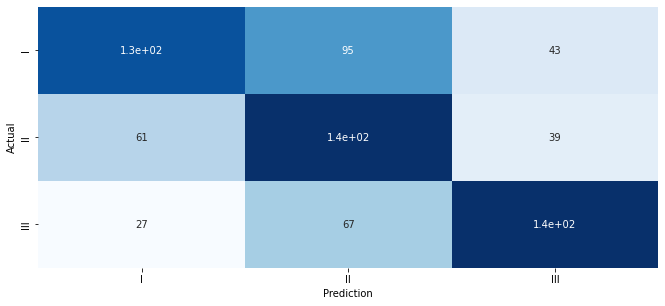

In [83]:
# MATRIZ DE CONFUSÃO

predictions = model.predict(X_test)

c_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

ax = sns.heatmap(c_matrix, annot=True, 
                 xticklabels=['I','II','III'],
                 yticklabels=['I','II','III'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [106]:
# CURVA ROC
y_test_pred_probs = model.predict(X_test)

# FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
# print(FPR, TPR, _)

roc_auc_score(y_test, y_test_pred_probs)

# plt.plot(FPR, TPR)
# plt.plot([0,1],[0,1],[0,1],[0,1],'--', color='black') #diagonal line
# plt.title('ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

24/24 [==============================] - 0s 3ms/step


0.7467630179715935

### CONLUSÃO

Em geral, qualquer limitação no desempenho geralmente se deve à falta de features fortes no conjunto de dados, e não à complexidade da rede neural usada. O conjunto de dados consiste apenas em quatro features, e pode-se argumentar que esses recursos sozinhos são insuficientes para realmente dizer se uma empresa pertence ao segmento de autosserviço, mercado quente ou mercado frio.